In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import csv

In [2]:
df = pd.read_csv('data_science_job.csv', encoding='latin-1', quoting=csv.QUOTE_ALL)

In [3]:
# Display the first 5 rows of the dataframe
print(df.head())

           Company                                    Job Title  \
0              SGS                        Clinical Data Analyst   
1          Ocorian                       AML/CFT & Data Analyst   
2           Cricut                    Machine Learning Engineer   
3      Bosch Group         Application Developer & Data Analyst   
4  Publicis Groupe  Data Engineer Full time (Public Sector) USA   

                          Location   Job Type Experience level   Salary  \
0    Richardson, TX, United States  Full Time      Entry-level   48K+ *   
1                 Ebène, Mauritius  Full Time      Entry-level   48K+ *   
2  South Jordan, UT, United States  Full Time              NaN   90K+ *   
3                 Nonantola, Italy  Full Time      Entry-level   48K+ *   
4     Arlington, VA, United States  Full Time        Mid-level    108K+   

                          Requirment of the company   \
0  Computer Science,Data quality,Genetics,Mathema...   
1           Agile,Data management,

In [4]:
print(df.info())    # Display the information of the dataframe        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB
None


In [5]:
print(df.describe()) # Display the summary statistics of the dataframe

                Company      Job Title          Location   Job Type  \
count              3197           3197              3197       3197   
unique             1106           2138              1117          3   
top     Publicis Groupe  Data Engineer  Bengaluru, India  Full Time   
freq                126            105                90       3116   

       Experience level    Salary  \
count              2962      3009   
unique                4       218   
top        Senior-level   115K+ *   
freq               1876       253   

                               Requirment of the company  Facilities  
count                                                3198       3198  
unique                                               2600        777  
top     Big Data,Business Intelligence,Data analysis,E...       ,,,,  
freq                                                   12        542  


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64


In [7]:
df.columns

Index(['Company', 'Job Title', 'Location', 'Job Type', 'Experience level',
       'Salary', 'Requirment of the company ', 'Facilities'],
      dtype='object')

In [8]:
# Remove rows with missing values in the 'Salary' column
df = df.dropna(subset=['Salary'])

# Verify the removal
missing_values = df.isnull().sum()
print(missing_values)

Company                         0
Job Title                       0
Location                        0
Job Type                        0
Experience level              232
Salary                          0
Requirment of the company       0
Facilities                      0
dtype: int64


In [9]:
unique_values = df['Experience level'].unique()
print(unique_values)

['Entry-level' nan 'Mid-level' 'Senior-level' 'Executive-level']


In [10]:
df['Salary']

0         48K+ *
1         48K+ *
2         90K+ *
3         48K+ *
4          108K+
          ...   
3193      39K+ *
3194      92K+ *
3195      62K+ *
3196      39K+ *
3197     115K+ *
Name: Salary, Length: 3009, dtype: object

In [11]:
df['Salary'] = df['Salary'].str.replace(r'\D', '', regex=True).astype(int) # Remove non-numeric characters and convert to integer

In [12]:
df['Salary'] = df['Salary'] * 1000 

In [13]:
df['Salary']

0        48000
1        48000
2        90000
3        48000
4       108000
         ...  
3193     39000
3194     92000
3195     62000
3196     39000
3197    115000
Name: Salary, Length: 3009, dtype: int32

In [14]:
average_salaries = df.groupby('Experience level')['Salary'].mean() # Calculate the average salary for each experience level
print(average_salaries) 

Experience level
Entry-level         49751.958225
Executive-level     98803.278689
Mid-level           66174.496644
Senior-level       105534.794521
Name: Salary, dtype: float64


In [15]:
# Define salary ranges
salary_ranges = {
    'Entry-level': (0, 49751.96),
    'Mid-level': (49751.96, 66174.50),
    'Senior-level': (66174.50, 105534.79),
    'Executive-level': (105534.79, float('inf'))
}


# Iterate over rows and impute missing experience levels
for index, row in df.iterrows():
    if pd.isnull(row['Experience level']):
        salary = row['Salary']
        for level, (min_salary, max_salary) in salary_ranges.items():
            if min_salary <= salary <= max_salary:
                df.at[index, 'Experience level'] = level
                break

In [16]:
unique_values = df['Experience level'].unique()
print(unique_values)

['Entry-level' 'Senior-level' 'Mid-level' 'Executive-level']


In [17]:
# Verify if there are any missing values
missing_values = df.isnull().sum()
print(missing_values)

Company                       0
Job Title                     0
Location                      0
Job Type                      0
Experience level              0
Salary                        0
Requirment of the company     0
Facilities                    0
dtype: int64


<Axes: xlabel='Salary', ylabel='Count'>

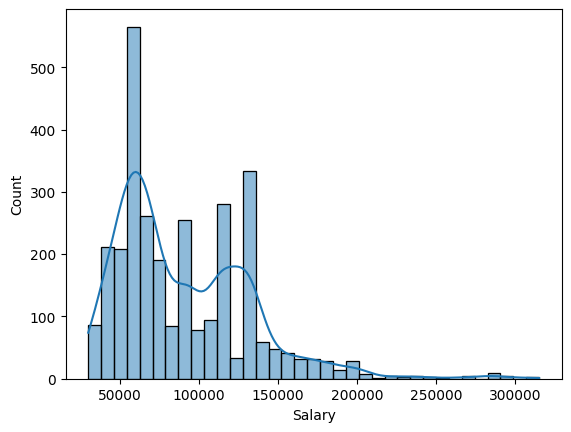

In [18]:
sns.histplot(data=df, x='Salary', kde=True) # Plot the distribution of salaries

In [19]:
total_unique_companies = df['Company'].nunique() # Calculate the total number of unique companies
print("Total number of unique companies: ", total_unique_companies)


Total number of unique companies:  1052


In [20]:
# show all the columns names
df.columns

Index(['Company', 'Job Title', 'Location', 'Job Type', 'Experience level',
       'Salary', 'Requirment of the company ', 'Facilities'],
      dtype='object')

<Axes: xlabel='Job Type', ylabel='count'>

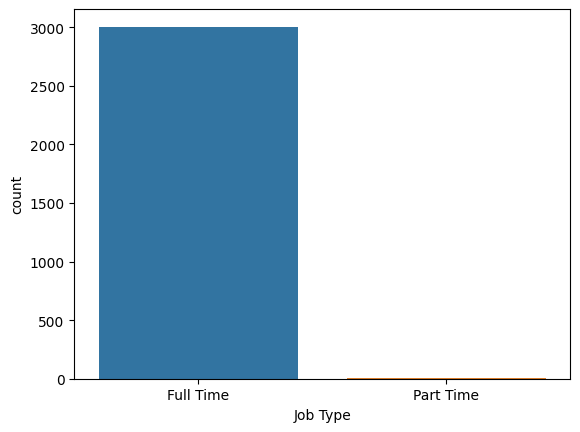

In [21]:
sns.countplot(data=df, x='Job Type') # Plot the number of job types

(-1.0999999999652503,
 1.0999999999983452,
 -1.099999999884371,
 1.0999999999900905)

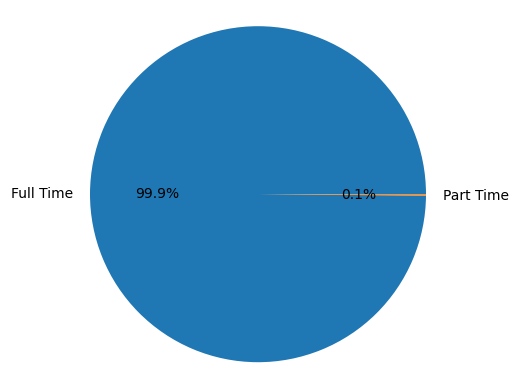

In [22]:
job_type_counts = df['Job Type'].value_counts()
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%') # Plot the distribution of job types
plt.axis('equal')

<Axes: ylabel='Salary'>

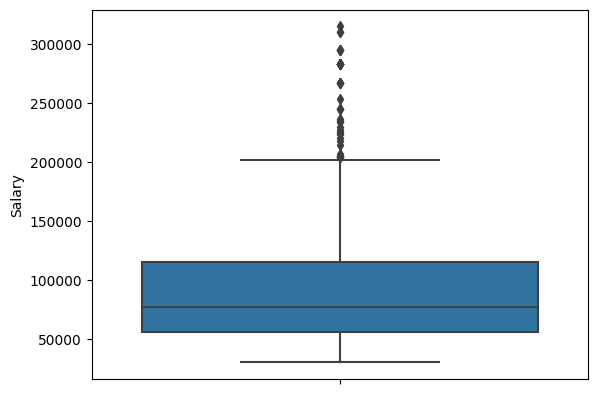

In [23]:
sns.boxplot(data=df, y='Salary') # Plot the distribution of salaries

<Axes: xlabel='Experience level', ylabel='Salary'>

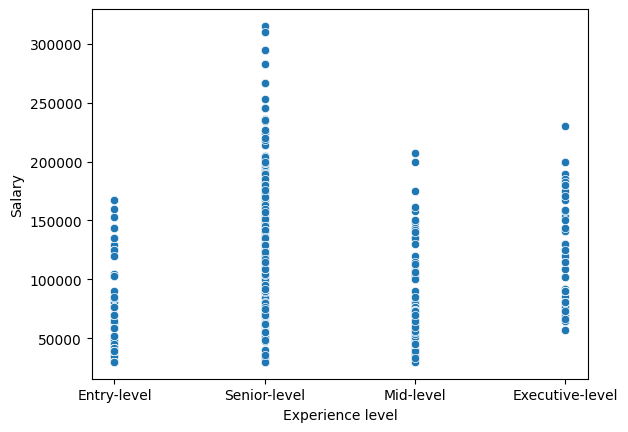

In [24]:
sns.scatterplot(data=df, x='Experience level', y='Salary')

<Axes: xlabel='Experience level', ylabel='Salary'>

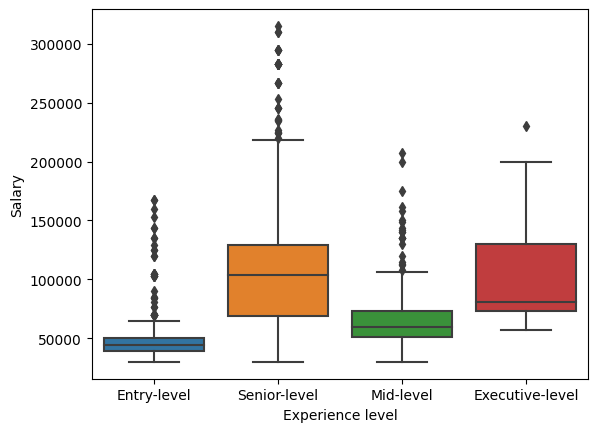

In [25]:
sns.boxplot(data=df, x='Experience level', y='Salary') # Plot the distribution of salaries by experience level

<Axes: xlabel='Experience level', ylabel='Salary'>

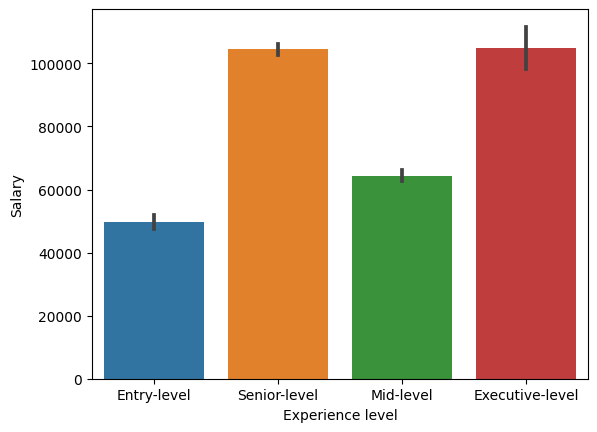

In [26]:
sns.barplot(data=df, x='Experience level', y='Salary')

<Axes: xlabel='Experience level', ylabel='Salary'>

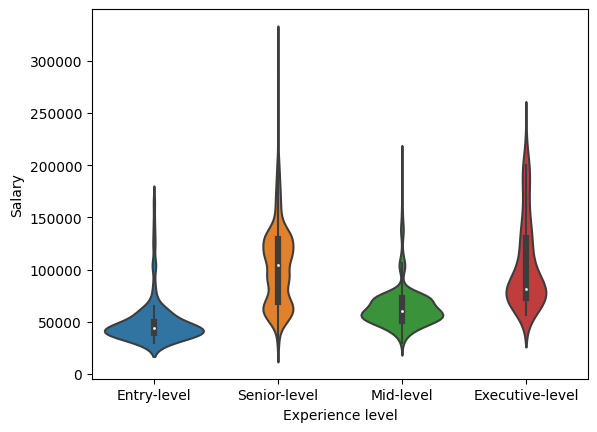

In [27]:
sns.violinplot(data=df, x='Experience level', y='Salary')

In [28]:
import plotly.express as px

fig = px.scatter(df, x='Experience level', y='Salary', color='Job Type', hover_data=['Company', 'Job Title'])
fig.show()

In [29]:
import plotly.graph_objects as go

avg_salary_by_experience = df.groupby('Experience level')['Salary'].mean()

fig = go.Figure(data=go.Bar(x=avg_salary_by_experience.index, y=avg_salary_by_experience))
fig.update_layout(xaxis_title='Experience Level', yaxis_title='Average Salary')
fig.show()